## **RICE CLASSIFICATION USING SUPPORT VECTOR MACHINE**



**STEP 1: PROBLEM STATEMENT**


A data scientist at a firm have been tasked to develop a model that can predict if a rice is Jasmine(1) or Gonen(0) using the numerical variables of Area,MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness and AspectRation. Please ensure to import riceClassification.csv file into a folder called sample_data.

**STEP 2: IMPORTING THE DATA**

In [1]:
# import libraries
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from joblib import dump
from joblib import load
from sklearn.model_selection import RandomizedSearchCV

In [2]:
dataset = pd.read_csv('sample_data/riceClassification.csv')

In [3]:
dataset.columns = ['id','Area','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Extent','Perimeter','Roundness','AspectRation','Class']

In [4]:
dataset.head()

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229316        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      76.004525  0.657536    273.085   0.764510      1.440796      1  
1      60.471018  0.713009    208.317   0.831658      1.453137      1  
2      62.296341  0.759153    210.012   0.868434      1.465950      1  
3      62.551300  0.783529    210.657   0.870203      1.483456      1  
4      68.571668  0.769375    230.332   0.874743      1.510000      1

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [ ]:
dataset.describe()

id          Area  MajorAxisLength  MinorAxisLength  \
count  18185.000000  18185.000000     18185.000000     18185.000000   
mean    9093.000000   7036.492989       151.680754        59.807851   
std     5249.701658   1467.197150        12.376402        10.061653   
min        1.000000   2522.000000        74.133114        34.409894   
25%     4547.000000   5962.000000       145.675910        51.393151   
50%     9093.000000   6660.000000       153.883750        55.724288   
75%    13639.000000   8423.000000       160.056214        70.156593   
max    18185.000000  10210.000000       183.211434        82.550762   

       Eccentricity    ConvexArea  EquivDiameter        Extent     Perimeter  \
count  18185.000000  18185.000000   18185.000000  18185.000000  18185.000000   
mean       0.915406   7225.817872      94.132952      0.616653    351.606949   
std        0.030575   1502.006571       9.906250      0.104389     29.500620   
min        0.676647   2579.000000      56.666658      0.383239    197.015000   
25%        0.891617   6125.000000      87.126656      0.538530    333.990000   
50%        0.923259   6843.000000      92.085696      0.601194    353.088000   
75%        0.941372   8645.000000     103.559146      0.695664    373.003000   
max        0.966774  11008.000000     114.016559      0.886573    508.511000   

          Roundness  AspectRation         Class  
count  18185.000000  18185.000000  18185.000000  
mean       0.707998      2.599081      0.549079  
std        0.067310      0.434836      0.497599  
min        0.174590      1.358128      0.000000  
25%        0.650962      2.208527      0.000000  
50%        0.701941      2.602966      1.000000  
75%        0.769280      2.964101      1.000000  
max        0.904748      3.911845      1.000000

In [ ]:
dataset.keys()

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [ ]:
dataset.shape

(18185, 12)

In [ ]:
dataset.tail()

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
18180  18181  5853       148.624571        51.029281      0.939210   
18181  18182  7585       169.593996        58.141659      0.939398   
18182  18183  6365       154.777085        52.908085      0.939760   
18183  18184  5960       151.397924        51.474600      0.940427   
18184  18185  6134       153.081981        51.590606      0.941500   

       ConvexArea  EquivDiameter    Extent  Perimeter  Roundness  \
18180        6008      86.326537  0.498594    332.960   0.663444   
18181        7806      98.272692  0.647461    385.506   0.641362   
18182        6531      90.023162  0.561287    342.253   0.682832   
18183        6189      87.112041  0.492399    343.371   0.635227   
18184        6283      88.374495  0.489975    338.613   0.672274   

       AspectRation  Class  
18180      2.912535      0  
18181      2.916910      0  
18182      2.925396      0  
18183      2.941216      0  
18184      2.967245      0

In [5]:
#checking duplicate values if any
dataset[dataset.duplicated()]

Empty DataFrame
Columns: [id, Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation, Class]
Index: []

**STEP 3: VISUALIZING THE DATA**

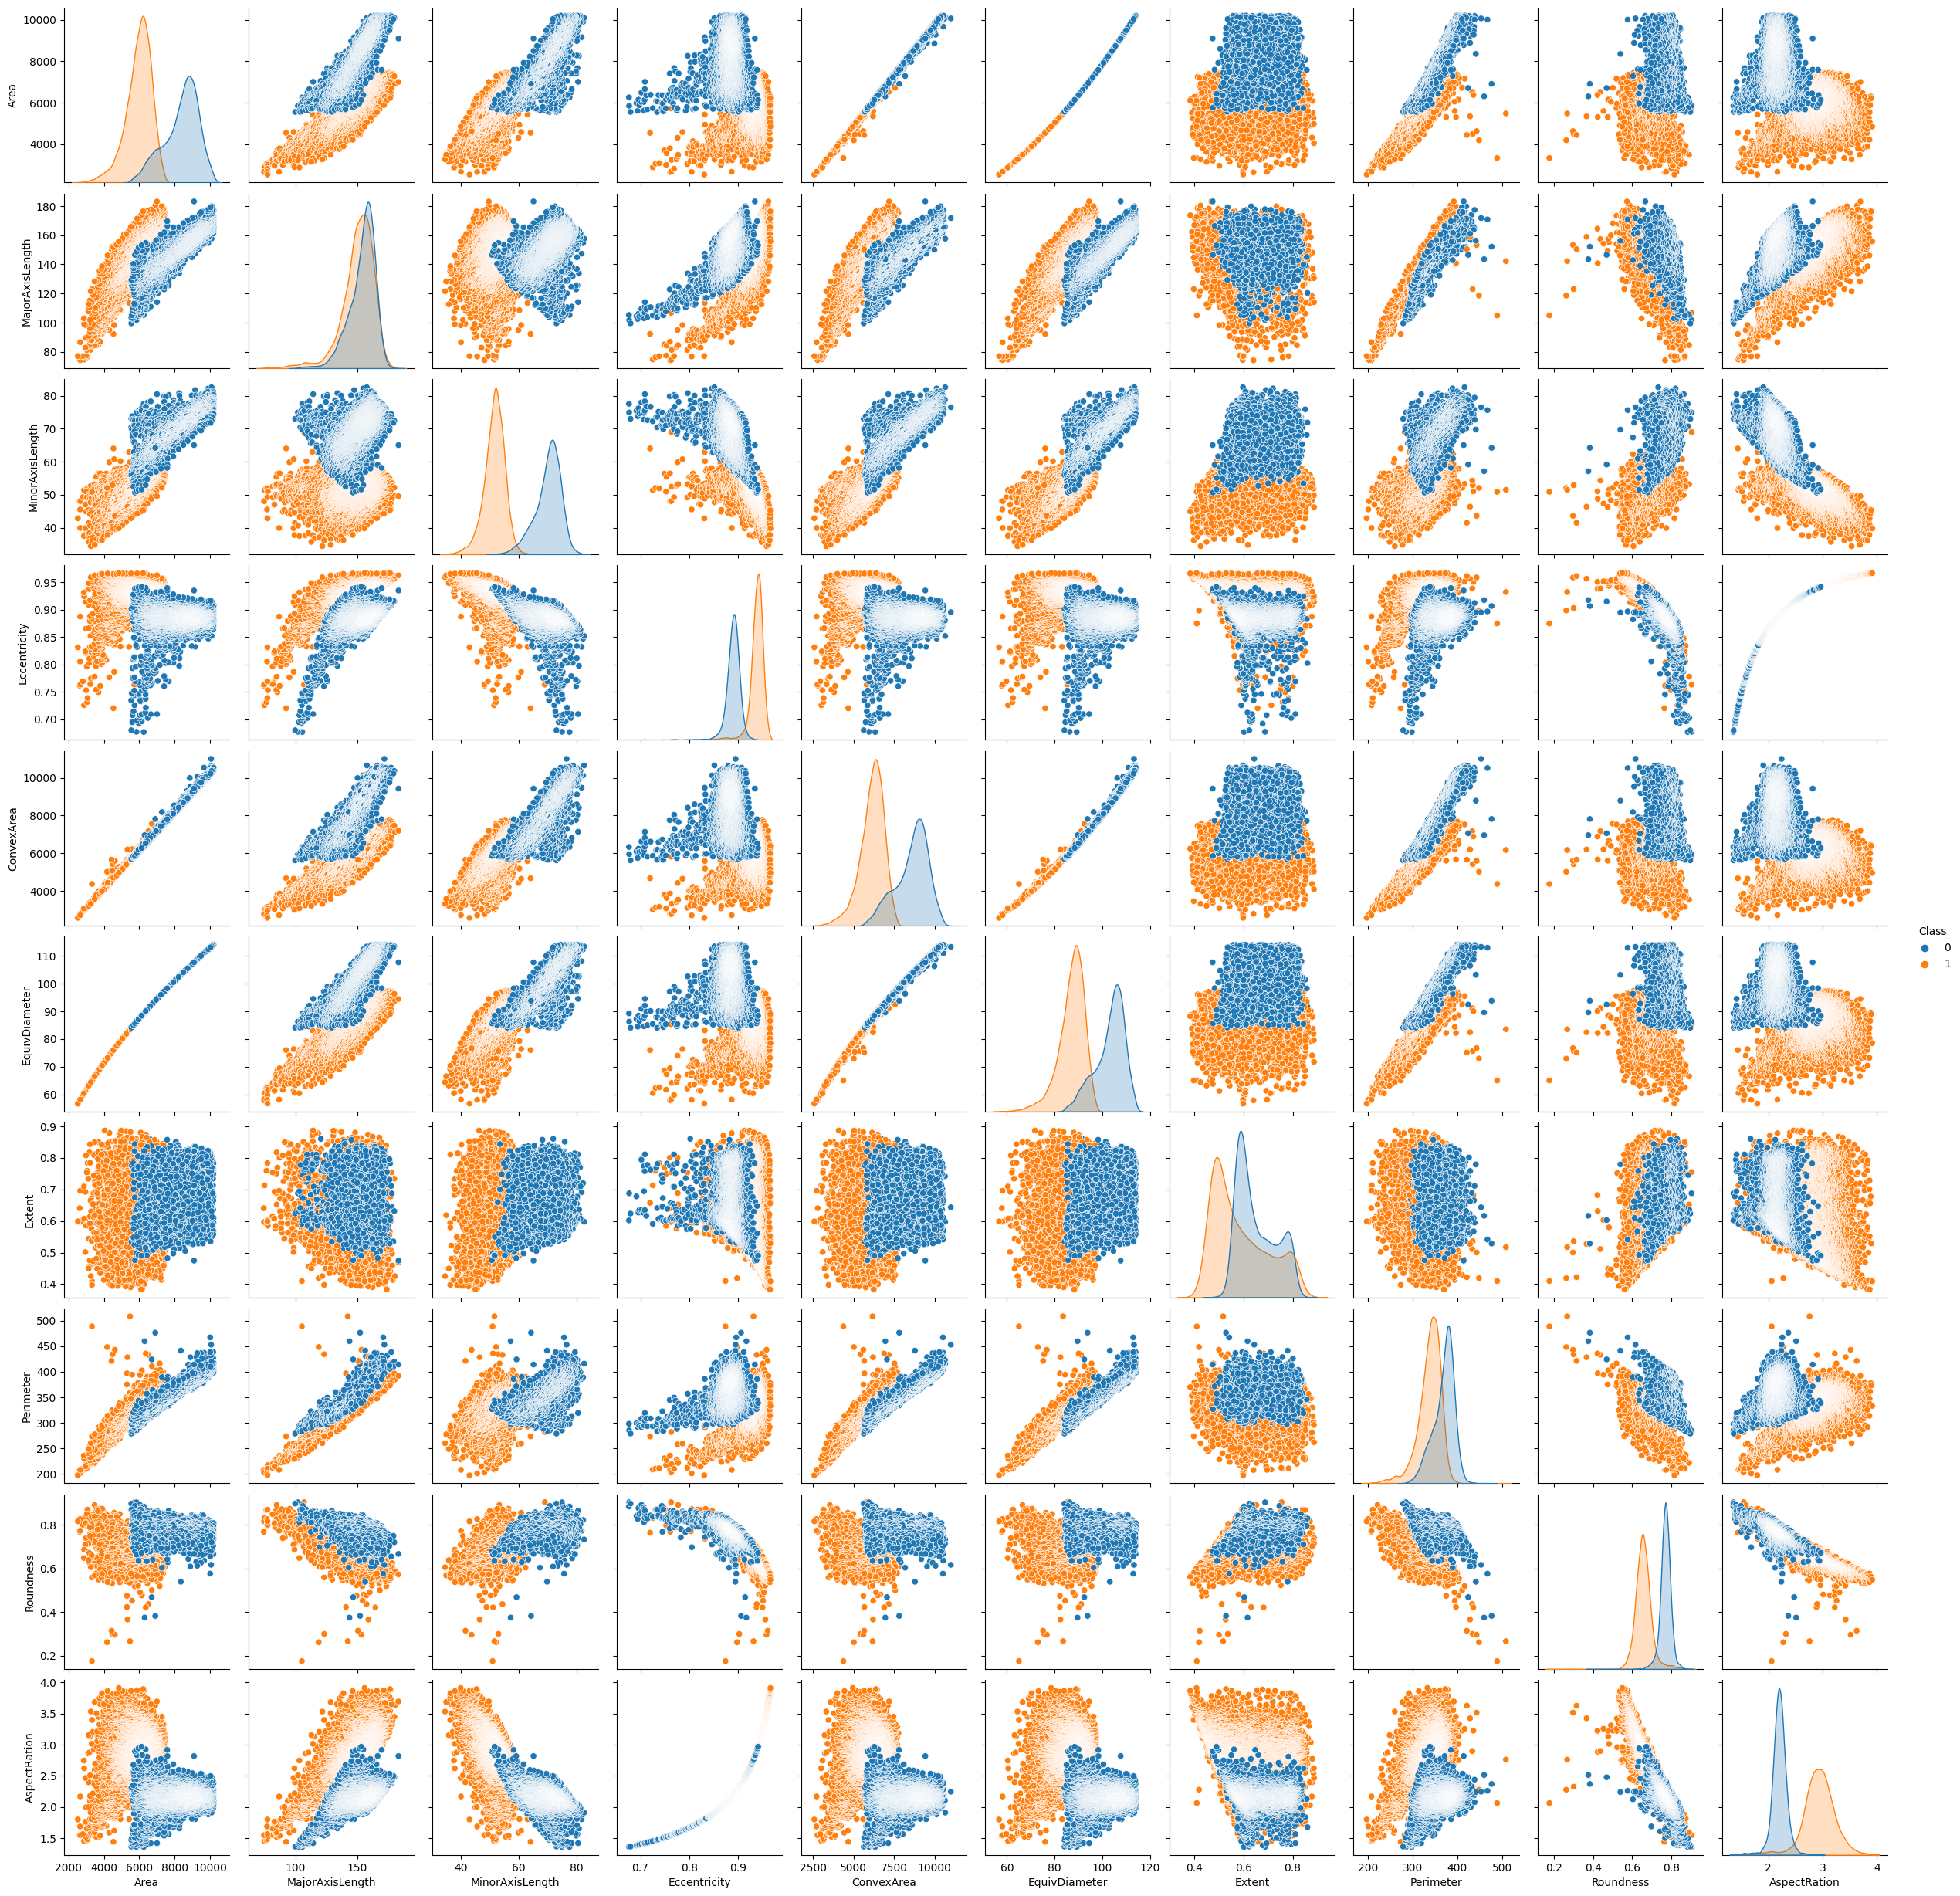

In [ ]:
sns.pairplot(dataset, hue='Class', vars=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation'])
plt.show()

In [ ]:
correlation_matrix = dataset.corr()

In [ ]:
print(correlation_matrix)

                       id      Area  MajorAxisLength  MinorAxisLength  \
id               1.000000  0.709155         0.464022         0.637148   
Area             0.709155  1.000000         0.599939         0.930215   
MajorAxisLength  0.464022  0.599939         1.000000         0.273211   
MinorAxisLength  0.637148  0.930215         0.273211         1.000000   
Eccentricity    -0.347816 -0.550073         0.295717        -0.808640   
ConvexArea       0.707600  0.999362         0.602061         0.928992   
EquivDiameter    0.706333  0.998158         0.618002         0.923790   
Extent           0.149924  0.230541        -0.073549         0.308541   
Perimeter        0.628830  0.881540         0.870178         0.674249   
Roundness        0.430033  0.620490        -0.202566         0.834398   
AspectRation    -0.382648 -0.623979         0.240471        -0.860516   
Class           -0.808591 -0.816589        -0.147741        -0.917766   

                 Eccentricity  ConvexArea  EquivDi

In [ ]:
correlation_with_target = correlation_matrix['Class'].sort_values(ascending=False)
print(correlation_with_target)

Class              1.000000
AspectRation       0.832563
Eccentricity       0.788636
MajorAxisLength   -0.147741
Extent            -0.303440
Perimeter         -0.533274
id                -0.808591
EquivDiameter     -0.809361
ConvexArea        -0.814214
Area              -0.816589
Roundness         -0.831759
MinorAxisLength   -0.917766
Name: Class, dtype: float64


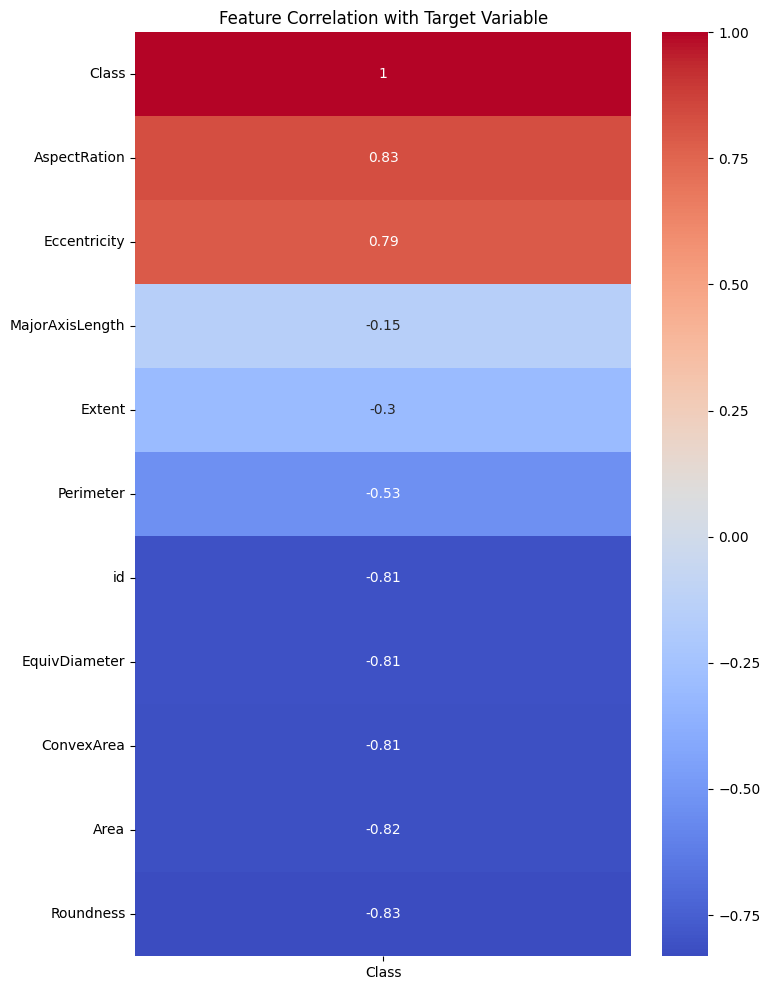

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(correlation_with_target[:-1].to_frame(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Target Variable')
plt.show()

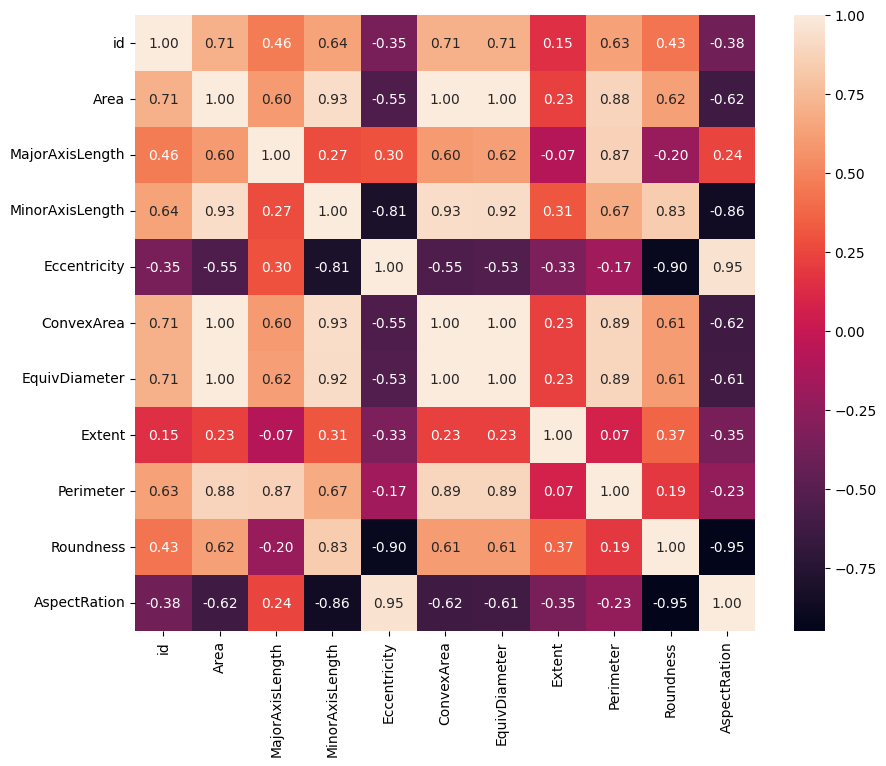

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.iloc[:, :-1].corr(), annot=True, fmt=".2f")
plt.show()

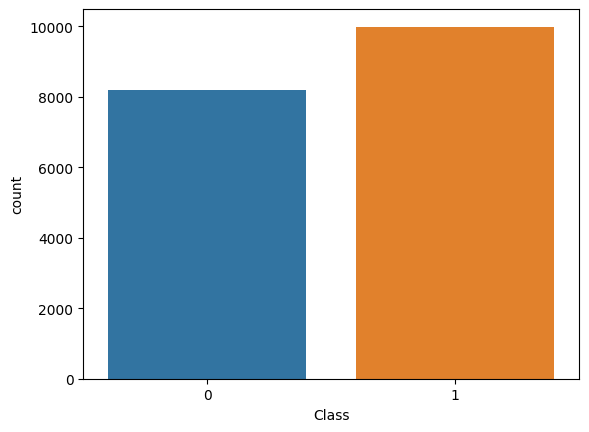

In [ ]:
sns.countplot(x='Class', data=dataset)
plt.show()

In [ ]:
correlation_matrix = dataset.corr()

highly_correlated_pairs = []


for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= 0.90:

            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))


for pair in highly_correlated_pairs:
    print(f"Variables: {pair[0]} and {pair[1]} have a correlation of {pair[2]:.2f}")

Variables: Area and MinorAxisLength have a correlation of 0.93
Variables: Area and ConvexArea have a correlation of 1.00
Variables: Area and EquivDiameter have a correlation of 1.00
Variables: MinorAxisLength and ConvexArea have a correlation of 0.93
Variables: MinorAxisLength and EquivDiameter have a correlation of 0.92
Variables: MinorAxisLength and Class have a correlation of -0.92
Variables: Eccentricity and Roundness have a correlation of -0.90
Variables: Eccentricity and AspectRation have a correlation of 0.95
Variables: ConvexArea and EquivDiameter have a correlation of 1.00
Variables: Roundness and AspectRation have a correlation of -0.95


id attribute is irrelevant here.
Additionally, here, a threshold of 0.9: or -0.9 is used to identify highly correlated features. Also, some domain knowledge on ellipse geometry is used here. The redundant features which I do not require are hence removed and the analysis is done on the following features only:
MajorAxisLength, MinorAxisLength, Perimeter, Extent, Eccentricity

**STEP 4: TRAINING THE MODEL**

In [4]:
#Identifying numerical and categorical variables
num_features = set(list(dataset.select_dtypes(include=['int64', 'float64']).columns))
cat_features = set(list(dataset.select_dtypes(include=['object', 'category']).columns))

#Adding a logic where if a numerical column has lesser than 13 unique values, I am considering it as categorical (threshold)
maybe_categorical = {x for x in num_features if dataset[x].nunique() <=12}
num_features = num_features - maybe_categorical
cat_features = cat_features.union(maybe_categorical)
print(f"The numerical features are: {num_features}")
print(f"The categorical features are: {cat_features}")

The numerical features are: {'AspectRation', 'Area', 'Eccentricity', 'Roundness', 'EquivDiameter', 'Extent', 'MinorAxisLength', 'ConvexArea', 'id', 'Perimeter', 'MajorAxisLength'}
The categorical features are: {'Class'}


In [7]:
#checking if missing values are present in dataset
# function returns 1 if there are missing values in a dataframe
def missing(df):
    new_df = df.dropna()
    if new_df.shape[0] != df.shape[0]:
        return 1
    return 0

result_dataset = missing(dataset)

print(f"Missing values in dataset: {result_dataset}")


Missing values in dataset: 0


In [5]:
X = dataset.iloc[:, [2, 3, 4, 7, 8]].values
y = dataset.iloc[:, -1].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [10]:
X_train.shape

(13638, 5)

In [ ]:
X_test.shape

(4547, 5)

In [ ]:
y_train.shape

(13638,)

In [ ]:
y_test.shape

(4547,)

In [7]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [8]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [9]:
random_grid_param = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"],
    "kernel": ['rbf'],
    "class_weight": [None, 'balanced']
}

In [10]:
#Using RandomizedSearchCV for hyperparameter tuning
svc_model = SVC()
random_search = RandomizedSearchCV(svc_model, random_grid_param, n_iter=10, cv=5, scoring="accuracy", refit=True, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'class_weight': [None, 'balanced'],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf']},
                   random_state=42, scoring='accuracy')

In [11]:
# Best model and predictions
print(random_search.best_params_)
best_svc_model = random_search.best_estimator_
y_pred = best_svc_model.predict(X_test_scaled)

{'kernel': 'rbf', 'gamma': 'auto', 'class_weight': None, 'C': 10}


**STEP 5: EVALUATING THE MODEL**

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2042
           1       0.99      0.99      0.99      2505

    accuracy                           0.99      4547
   macro avg       0.99      0.99      0.99      4547
weighted avg       0.99      0.99      0.99      4547



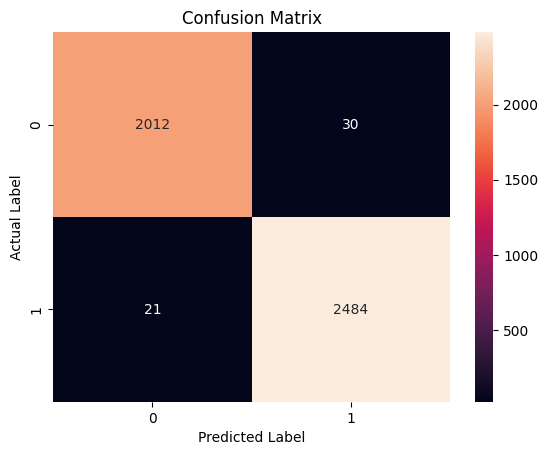

In [12]:
# Evaluation
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**STEP 6: EXPORTING THE MODEL**

In [14]:
# Saving the model and scaler
dump(best_svc_model, 'svm_model.joblib')
dump(sc, 'scaler.joblib')

['scaler.joblib']